In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# for display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from datetime import datetime

# Time Series

## Python: Datetime Data Types and their Methods

Datetime Data types:
- datetime, timedelta
- date, time, tzinfo(time zone related)

### datetime
It contains two parts that can be accessed by: date( ) & time( ), each part contains multiple attributes such as year/month/day or hour/minute/second.

#### Task: print current date & time

In [95]:
now_obj = datetime.now() # Note the syntax, different as datetime(2020,3,16)

now_obj
type(now_obj)

now_obj.date(), now_obj.time()

now_obj.year, now_obj.month,  now_obj.day
now_obj.hour, now_obj.minute, now_obj.second

datetime.datetime(2020, 3, 16, 8, 27, 10, 595417)

datetime.datetime

(datetime.date(2020, 3, 16), datetime.time(8, 27, 10, 595417))

(2020, 3, 16)

(8, 27, 10)

### timedelta
It can be used to create time-shifted datetime objects. It has two attributes: days & seconds

In [89]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days, delta.seconds 

datetime.timedelta(days=926, seconds=56700)

(926, 56700)

#### Task: find the date & time 10 weeks and 2 hours ago from now

In [102]:
from datetime import timedelta
now_obj - timedelta(days=10*7, seconds=7200) 

datetime.datetime(2020, 1, 6, 6, 27, 10, 595417)

### Inter-convertion b/t String and Datetime
A very common, must-know operation!
#### Using Python's datetime methods

In [114]:
# Extracting string from datetime obj
# ft. datetime.strftime()

# manually create the format
str_format = 'Date: %Y/%m/%d, Hour: %H:%M'

stamp = datetime(2020,3,15,8)
stamp

t_str = stamp.strftime(str_format)
t_str

# String parsed as a datetime object
# ft. datetime.strptime()

stamp = datetime.strptime(t_str, str_format)
stamp

datetime.datetime(2020, 3, 15, 8, 0)

'Date: 2020/03/15, Hour: 08:00'

datetime.datetime(2020, 3, 15, 8, 0)

In [117]:
# convert multiple strings

date_strs = ['7/6/2011', '8/6/2011']
dates = [datetime.strptime(s, '%m/%d/%Y') for s in date_strs]
dates

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

#### Using Pandas

In [119]:
date_strs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
idx = pd.to_datetime(date_strs)
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [121]:
type(idx[0])
type(idx.year)
idx.year, idx.hour

pandas._libs.tslibs.timestamps.Timestamp

pandas.core.indexes.numeric.Int64Index

(Int64Index([2011, 2011], dtype='int64'), Int64Index([12, 0], dtype='int64'))

## Pandas: Time Series Basics

In [127]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    1.187187
2011-01-05    0.674309
2011-01-07   -1.842730
2011-01-08    0.753550
2011-01-10    0.559430
2011-01-12   -0.111409
dtype: float64

In [128]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

### Access the Timer Series: Indexing and Selection

In [136]:
ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
ts.sample(3)

2001-12-25   -1.206048
2002-09-13   -0.917514
2001-10-04   -0.953536
dtype: float64

#### Passing any wanted date using a string, or a datetime/Timestamp object

In [137]:
# string date
ts['1/10/2000'], ts['20010110'] # US style

# datetime obj
ts[datetime(2001,1,7)]

# Timestamp
stamp = ts.index[1]
ts[stamp]

(-0.30664756903190776, -0.8835704463424742)

-0.7429201779897601

1.322052300208104

#### Slicing

In [139]:
ts['1/1/2000':'1/3/2000']

2000-01-01   -0.393447
2000-01-02    1.322052
2000-01-03    0.404592
Freq: D, dtype: float64

In [144]:
ts[datetime(2002, 9, 24):]

2002-09-24   -0.508967
2002-09-25   -1.061356
2002-09-26   -1.355096
Freq: D, dtype: float64

In [149]:
ts.truncate(after='1/3/2000')
ts[:'1/3/2000'] # equivalent... yep... I know!

2000-01-01   -0.393447
2000-01-02    1.322052
2000-01-03    0.404592
Freq: D, dtype: float64

2000-01-01   -0.393447
2000-01-02    1.322052
2000-01-03    0.404592
Freq: D, dtype: float64

#### Task: Select all entries for May, 2000

In [150]:
ts['2001-05'].head(3)

2001-05-01    1.007352
2001-05-02   -1.261425
2001-05-03    0.031953
Freq: D, dtype: float64

#### Task: merge all entries with the same date and replace the value with the daily mean

In [158]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [159]:
new_ts = dup_ts.groupby(level=0).mean()

### Date Ranges, Frequencies, and Shifting

#### Generating Date Ranges

In [175]:
pd.date_range('2012-04-01', '2012-04-4')  # default frequency: day

pd.date_range('2000-01-01', '2000-01-02', freq='8h')
pd.date_range('2000-01-01', '2000-01-02', freq='4h30min')

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04'], dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 08:00:00',
               '2000-01-01 16:00:00', '2000-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='8H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:30:00',
               '2000-01-01 09:00:00', '2000-01-01 13:30:00',
               '2000-01-01 18:00:00', '2000-01-01 22:30:00'],
              dtype='datetime64[ns]', freq='270T')

In [172]:
# specifiy only start or end
pd.date_range(start='2012-04-01', periods=5)
pd.date_range(end  ='2012-06-01', periods=5)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2012-05-28', '2012-05-29', '2012-05-30', '2012-05-31',
               '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

##### Special frequencies:
- every 3rd Friday of the month
- every last business day of the month

In [177]:
pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
pd.date_range('2000-01-01', '2000-06-01', freq='BM')

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31'],
              dtype='datetime64[ns]', freq='BM')

#### Shifting Data

In [196]:
np.random.seed(42)
ts = pd.Series(np.random.rand(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.374540
2000-02-29    0.950714
2000-03-31    0.731994
2000-04-30    0.598658
Freq: M, dtype: float64

##### Task: compute percent changes in the Series

In [201]:
100 * ts / ts.shift(1) -1

2000-01-31           NaN
2000-02-29    252.835106
2000-03-31     75.994102
2000-04-30     80.784623
Freq: M, dtype: float64

##### Shifting data with known frequency

In [202]:
ts.shift(2, freq='M')
ts.shift(3, freq='D')
ts.shift(1, freq='90T') # 90 minutes

2000-03-31    0.374540
2000-04-30    0.950714
2000-05-31    0.731994
2000-06-30    0.598658
Freq: M, dtype: float64

2000-02-03    0.374540
2000-03-03    0.950714
2000-04-03    0.731994
2000-05-03    0.598658
dtype: float64

2000-01-31 01:30:00    0.374540
2000-02-29 01:30:00    0.950714
2000-03-31 01:30:00    0.731994
2000-04-30 01:30:00    0.598658
Freq: M, dtype: float64

#### Shifting with special offsets

In [204]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime.now()
now + 3 * Day()

Timestamp('2020-03-19 15:58:47.211389')

In [206]:
now + MonthEnd()
now + MonthEnd(2)

Timestamp('2020-03-31 15:58:47.211389')

Timestamp('2020-04-30 15:58:47.211389')

In [207]:
offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

Timestamp('2020-03-31 15:58:47.211389')

Timestamp('2020-02-29 15:58:47.211389')

#### Task: calculate monthly averages

In [ ]:
ts = pd.Series(np.random.rand(100),
               index=pd.date_range('1/1/2000', periods=100, freq='d'))
ts.head(3)

A creative way of using Groupby !

In [232]:
offset = MonthEnd()
ts.groupby(offset.rollforward).mean()

2000-01-01    0.421828
2000-01-02    0.411021
2000-01-03    0.907611
Freq: D, dtype: float64

2000-01-31    0.472055
2000-02-29    0.475483
2000-03-31    0.494821
2000-04-30    0.409848
dtype: float64

Another way: using resample

In [12]:
ts.resample('M').mean()

2000-01-31    0.529425
2000-02-29   -0.369094
2000-03-31   -0.184468
Freq: M, dtype: float64

## Time Zone Handling

#### Common Time Zones

In [256]:
import pytz
pytz.common_timezones[-10:]

['Pacific/Wake',
 'Pacific/Wallis',
 'US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific',
 'UTC']

#### Time Zone Object

In [257]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [278]:
dates = pd.date_range('3/5/2012 9:30', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(dates)), index=dates)
ts

# by default: no time zone
print(ts.index.tz)

2012-03-05 09:30:00    1.070150
2012-03-06 09:30:00   -0.026521
2012-03-07 09:30:00   -0.881875
2012-03-08 09:30:00   -0.163067
2012-03-09 09:30:00   -0.744903
Freq: D, dtype: float64

None


#### Add time zone information

In [282]:
ts_pacific = ts.tz_localize('US/Pacific')
ts_pacific

2012-03-05 09:30:00-08:00    1.070150
2012-03-06 09:30:00-08:00   -0.026521
2012-03-07 09:30:00-08:00   -0.881875
2012-03-08 09:30:00-08:00   -0.163067
2012-03-09 09:30:00-08:00   -0.744903
Freq: D, dtype: float64

#### Convert to a different time zone

In [284]:
ts_pacific.tz_convert('America/New_York')
ts_pacific.tz_convert('Europe/Berlin')
ts_pacific.tz_localize('Asia/Shanghai')

2012-03-05 12:30:00-05:00    1.070150
2012-03-06 12:30:00-05:00   -0.026521
2012-03-07 12:30:00-05:00   -0.881875
2012-03-08 12:30:00-05:00   -0.163067
2012-03-09 12:30:00-05:00   -0.744903
Freq: D, dtype: float64

2012-03-05 18:30:00+01:00    1.070150
2012-03-06 18:30:00+01:00   -0.026521
2012-03-07 18:30:00+01:00   -0.881875
2012-03-08 18:30:00+01:00   -0.163067
2012-03-09 18:30:00+01:00   -0.744903
Freq: D, dtype: float64

In [21]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

## Resampling and Frequency Conversion

In [285]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.head(3)

ts.resample('M').mean()
ts.resample('M', kind='period').mean()

2000-01-01    0.213294
2000-01-02    0.001205
2000-01-03   -0.817089
Freq: D, dtype: float64

2000-01-31   -0.012111
2000-02-29   -0.148920
2000-03-31   -0.048884
2000-04-30   -0.288503
Freq: M, dtype: float64

2000-01   -0.012111
2000-02   -0.148920
2000-03   -0.048884
2000-04   -0.288503
Freq: M, dtype: float64

### Downsampling

In [286]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [287]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

## Moving Window Functions

In [289]:
!head -n3 examples/stock_px_2.csv

,AAPL,MSFT,XOM,SPX
2003-01-02 00:00:00,7.4,21.11,29.22,909.03
2003-01-03 00:00:00,7.45,21.14,29.24,908.59


In [292]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',                            
                           parse_dates=True, index_col=0)
close_px_all.head()
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


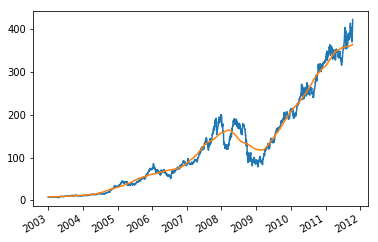

In [294]:
close_px.AAPL.plot();
close_px.AAPL.rolling(250, center=True, min_periods=20).mean().plot();

### Exponentially Weighted Functions

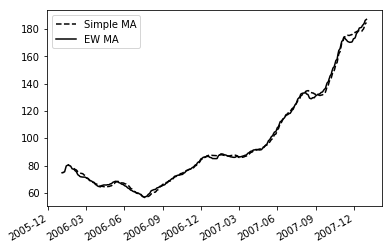

In [297]:
aapl_px = close_px.AAPL['2006':'2007']
ma60   = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend();